In [2]:
import pandas as pd

In [3]:
car_acc=pd.read_csv('road-accidents.csv',comment='#',sep='|')

###### This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)

In [4]:
rows_and_cols=car_acc.shape

In [5]:
rows_and_cols

(51, 5)

In [6]:
print('There are {} rows and {} columns .\n'.format(rows_and_cols[0],rows_and_cols[1]))

There are 51 rows and 5 columns .



In [7]:
car_acc_information= car_acc.info()
print(car_acc_information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


In [8]:
car_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [9]:
car_acc.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


# Textual and Graphical Summary

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


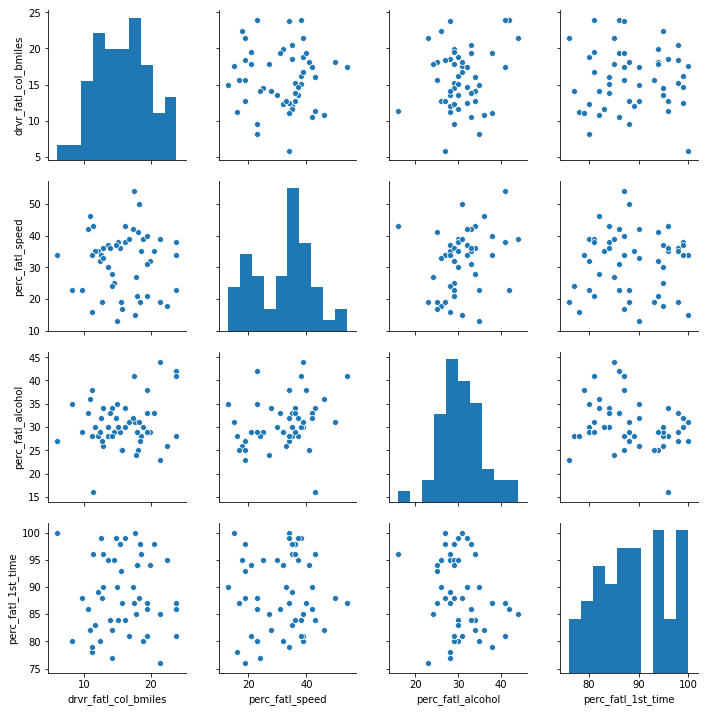

In [14]:
import seaborn as sns
%matplotlib inline
sum_stat_car=car_acc.describe()
print(sum_stat_car)
sns.pairplot(car_acc)

# Quantifying the association of features and accidents

Thresholds<br/>
0.2= Weak<br/>
0.5=medium<br/>
0.8=strong<br/>
0.9=very strong<br/>

In [15]:
corr_columns=car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


# Fitting a multivariate linear regression

A->B->Y

A->Y

In [16]:
from sklearn import linear_model

In [17]:
features=car_acc.drop(['state','drvr_fatl_col_bmiles'],axis=1)

In [19]:
target=car_acc['drvr_fatl_col_bmiles']

In [20]:
reg=linear_model.LinearRegression()

In [21]:
reg.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
fit_coef=reg.coef_

In [23]:
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

# PCA On Standardized Data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
features_scaled=scaler.fit_transform(features)

C:\Users\SMIT SHAH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SMIT SHAH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA()

In [30]:
pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x273c59f19e8>,
 <a list of 3 Text xticklabel objects>)

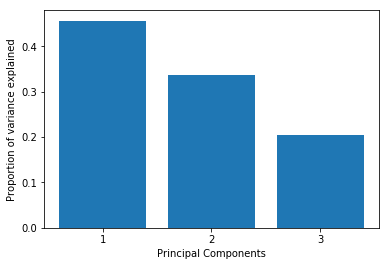

In [39]:
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of variance explained')
plt.xticks([1,2,3])


In [40]:
two_first_com_var_exp=pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(round(two_first_com_var_exp,5)))

The cumulative variance of the first two principal components is 0.7947


In [41]:
pca.explained_variance_

array([1.39759626, 1.0341792 , 0.62822455])

# Visualizing the first two principal components

In [42]:
pca=PCA(n_components=2)
p_comps=pca.fit_transform(features_scaled)

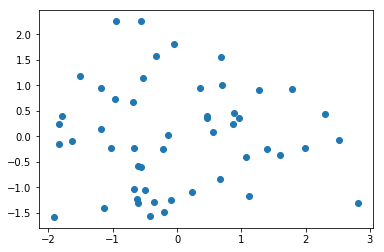

In [43]:
p_comp1=p_comps[:,0]
p_comp2=p_comps[:,1]
plt.scatter(p_comp1,p_comp2)

In [46]:
from sklearn.cluster import KMeans

range(1, 10)
[153.0, 101.59081556315158, 72.2927700454625, 57.79112485460041, 46.10580914149266, 39.21336465568099, 32.99014870290527, 29.381198487871384, 25.984687397681462]


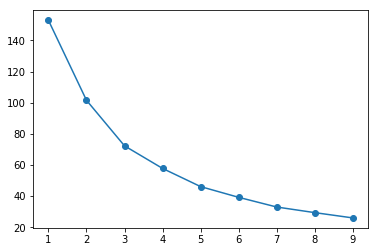

In [57]:
ks=range(1,10)
inertias=[]
for k in ks:
    km=KMeans(n_clusters=k,random_state=8)
    km.fit(features_scaled)
    inertias.append(km.inertia_)
plt.plot(ks,inertias,marker='o')
print(ks)
print(inertias)    

In [58]:
km=KMeans(n_clusters=3,random_state=8)

In [59]:
km.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=8, tol=0.0001, verbose=0)

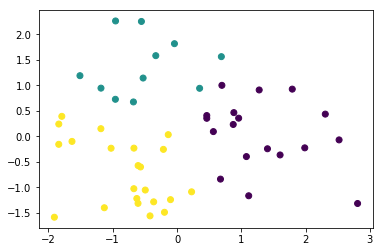

In [60]:
plt.scatter(p_comp1,p_comp2,c=km.labels_)

In [61]:
car_acc['cluster']=km.labels_

In [71]:
car_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,Alabama,18.8,39,30,80,0
1,Alaska,18.1,41,25,94,2
2,Arizona,18.6,35,28,96,2
3,Arkansas,22.4,18,26,95,2
4,California,12.0,35,28,89,2


In [62]:
metl_car=pd.melt(car_acc,id_vars='cluster',var_name="measurement",value_name='percent',value_vars=features)

In [63]:
metl_car.head()

,cluster,measurement,percent
0,0,perc_fatl_speed,39
1,2,perc_fatl_speed,41
2,2,perc_fatl_speed,35
3,2,perc_fatl_speed,18
4,2,perc_fatl_speed,35


C:\Users\SMIT SHAH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


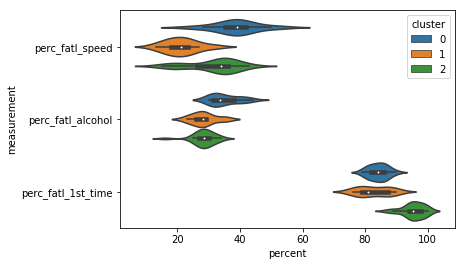

In [64]:
sns.violinplot(x=metl_car["percent"],y=metl_car["measurement"],hue=metl_car['cluster'])

In [65]:
miles_driven=pd.read_csv('miles-driven.csv',sep='|')

In [66]:
car_acc_miles=pd.merge(car_acc,miles_driven,on="state")

In [67]:
car_acc_miles['num_drvr_fatl_col']=car_acc_miles['drvr_fatl_col_bmiles']*car_acc_miles['million_miles_annually']/1000

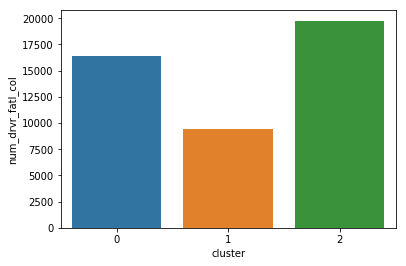

In [68]:
sns.barplot(x="cluster",y="num_drvr_fatl_col",data=car_acc_miles,estimator=sum,ci=None)

In [1]:
print('cluster2 needs hightest attention') 

cluster2 needs hightest attention


In [69]:
coun_mean_sum=car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count','mean','sum'])

In [70]:
coun_mean_sum

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291
